In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd



class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

    def __str__(self):
        return f"{self.name} ({self.price})"


class Order:
    def __init__(self, order_id, products, customer_id, store_id):
        self.order_id = order_id
        self.products = products
        self.customer_id = customer_id
        self.store_id = store_id
        self.timestamp = datetime.now() - timedelta(
            days=random.randint(0, 6),
            hours=random.randint(0, 23),
            minutes=random.randint(0, 59),
        )

    def total_price(self):
        return sum(product.price for product in self.products)


class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, products_list, store_id):
        order_id = random.randint(1000, 9999)
        num_products = random.randint(1, len(products_list))
        selected_products = random.sample(products_list, num_products)
        order = Order(order_id, selected_products, self.customer_id, store_id)
        self.orders.append(order)
        return order


class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.orders = []

    def record_order(self, customer, products):
        order = customer.create_order(products, self.store_id)
        self.orders.append(order)
        return order

    def get_total_sales(self):
        return round(sum(order.total_price() for order in self.orders), 2)


class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def generate_sales_report(self):
        all_orders = []
        for store in self.stores:
            for order in store.orders:
                date_str = order.timestamp.strftime("%Y-%m-%d")
                time_str = order.timestamp.strftime("%H:%M:%S")
                product_info = [str(product) for product in order.products]
                all_orders.append((
                    order.timestamp,
                    date_str,
                    time_str,
                    order.store_id,
                    order.customer_id,
                    order.order_id,
                    product_info,
                    round(order.total_price(), 2),
                ))

        all_orders.sort(key=lambda x: x[0], reverse=True)

        # Create a Pandas DataFrame from the order data and assign it to df
        global df  # Declare df as a global variable
        df = pd.DataFrame(
            all_orders,
            columns=[
                "Timestamp",
                "Date",
                "Time",
                "StoreID",
                "CustomerID",
                "OrderID",
                "Products",
                "Total",
            ],
        )
        print(df)

        for store in self.stores:
            print(f"Store {store.store_id} Total Sales: ${store.get_total_sales()}")

        total_corp_sales = round(
            sum(store.get_total_sales() for store in self.stores), 2
        )
        print(f"Total Corporation Sales: ${total_corp_sales}")


if __name__ == "__main__":
    corp = Corporation("Global Corp")
    for i in range(1, 201):  # Increased to 200 stores
        corp.add_store(Store(i))

    top_15_electronic_brands = [
        "Samsung",
        "Apple",
        "Sony",
        "LG",
        "Panasonic",
        "Dell",
        "HP",
        "Microsoft",
        "Lenovo",
        "Asus",
        "Acer",
        "Xiaomi",
        "Huawei",
        "TCL",
        "Intel",
    ]
    top_15_electronic_items_with_pricing = [
        ("Smartphone", 700),
        ("Laptop", 1200),
        ("Tablet", 350),
        ("Smart TV", 800),
        ("Headphones", 150),
        ("Wireless Earbuds", 120),
        ("Smartwatch", 250),
        ("Gaming Console", 400),
        ("Digital Camera", 600),
        ("Desktop Computer", 1000),
        ("Bluetooth Speaker", 80),
        ("External Hard Drive", 100),
        ("Printer", 150),
        ("Router", 80),
        ("Power Bank", 40),
    ]

    generated_products = [
        Product(
            f"{random.choice(top_15_electronic_brands)} {item}",
            round(price * (1 + random.uniform(-0.1, 0.1)), 2),
        )
        for _ in range(20)
        for item, price in [random.choice(top_15_electronic_items_with_pricing)]
    ]

    customers = [Customer(i) for i in range(1001, 1501)]  # Increased to 500 customers

    for _ in range(500):  # Increased to 500 transactions
        store = random.choice(corp.stores)
        customer = random.choice(customers)
        store.record_order(customer, generated_products)

    corp.generate_sales_report()

                    Timestamp        Date      Time  StoreID  CustomerID  \
0  2024-11-21 01:41:04.474147  2024-11-21  01:41:04      127        1246   
1  2024-11-21 01:39:04.476460  2024-11-21  01:39:04       91        1302   
2  2024-11-21 01:37:04.483412  2024-11-21  01:37:04       25        1407   
3  2024-11-21 01:30:04.470152  2024-11-21  01:30:04      167        1091   
4  2024-11-21 01:27:04.482669  2024-11-21  01:27:04      173        1251   

   OrderID                                           Products    Total  
0     6100  ['LG Laptop (1160.21)', 'HP External Hard Driv...  1425.77  
1     6774  ['Samsung Headphones (143.88)', 'LG Desktop Co...  4487.11  
2     8800  ['HP External Hard Drive (97.23)', 'LG Router ...  3843.81  
3     5626  ['LG Smartphone (725.84)', 'Asus Bluetooth Spe...  5796.33  
4     3462  ['Xiaomi Headphones (160.39)', 'Microsoft Lapt...  5444.52  



Most Prevalent Products:
 Products
['Sony Printer (159.27)']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         4
['Microsoft Laptop (1249.11)']                                                                                                                                                                                                                                                                                                                                                  

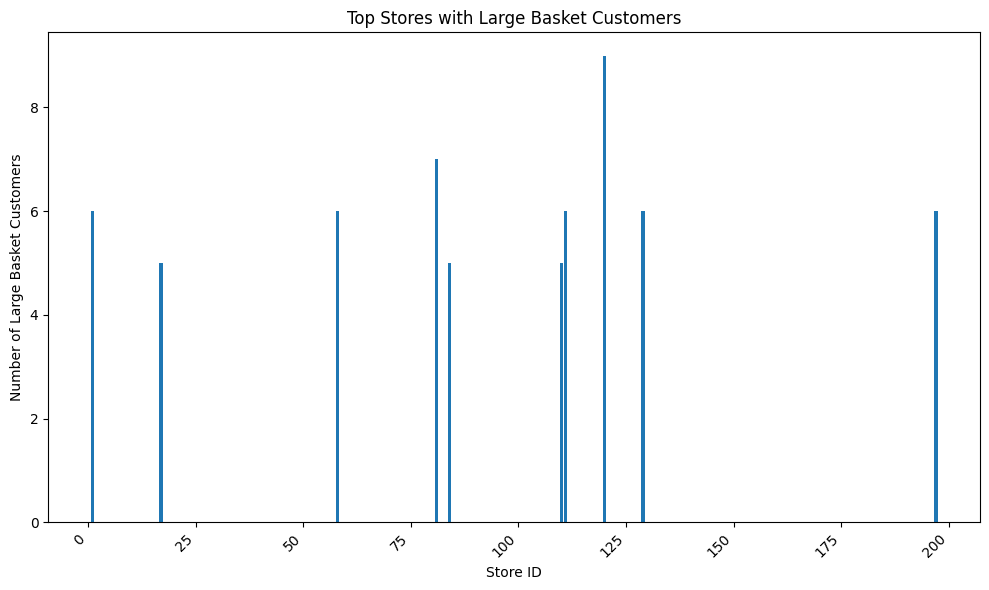


Top 10 Products purchased by Large Basket Customers:
 Products
['Microsoft Laptop (1249.11)']                                                                                                                                                                                                                                                                                                                    2
['LG Smartphone (725.84)']                                                                                                                                                                                                                                                                                                                        2
['Sony Printer (159.27)', 'Xiaomi Headphones (160.39)', 'HP External Hard Drive (97.23)', 'Asus Bluetooth Speaker (74.64)', 'Acer Digital Camera (606.99)', 'LG Smartphone (725.84)', 'Samsung Headphones (143.88)', 'Acer Bluetooth Speaker (85.55)', 'Acer Sma

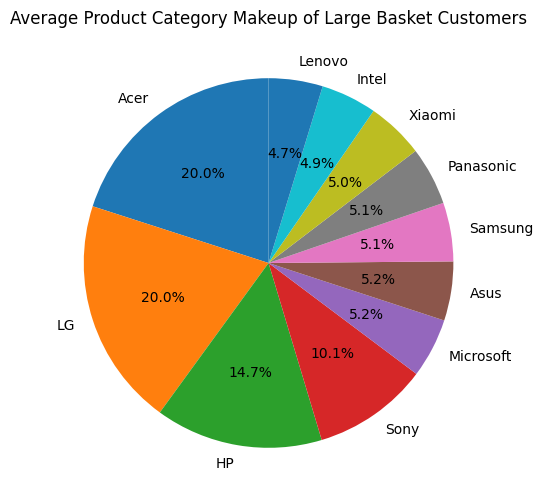

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame created in your previous code
# If not, replace 'df' with the correct DataFrame variable

# 1. The most prevalent products in customer baskets
product_counts = df.explode('Products')['Products'].value_counts()
print("\nMost Prevalent Products:\n", product_counts)

# 2. The frequency by which customers were large buyers, or filled up large baskets
# Define a threshold for large baskets (e.g., total order value > $500)
large_basket_threshold = 500
df['LargeBasket'] = df['Total'] > large_basket_threshold
large_basket_counts = df.groupby('CustomerID')['LargeBasket'].sum()
print("\nFrequency of Large Basket Buyers:\n", large_basket_counts)

# 3. Which stores contained the large-basket buyers, and by how much
store_large_basket_counts = df[df['LargeBasket']].groupby('StoreID')['Total'].sum()
print("\nStores with Large Basket Buyers:\n", store_large_basket_counts)


# 4. A visualization that ranks the top, large-basket customer stores, by frequency
top_stores_large_baskets = df[df['LargeBasket']].groupby('StoreID')['CustomerID'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_stores_large_baskets.index, top_stores_large_baskets.values)
plt.xlabel('Store ID')
plt.ylabel('Number of Large Basket Customers')
plt.title('Top Stores with Large Basket Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. A top-n list of products, which were typical to customers in this demographic
# Find the top 10 products purchased by large basket customers
top_products_large_baskets = df[df['LargeBasket']].explode('Products')['Products'].value_counts().head(10)
print("\nTop 10 Products purchased by Large Basket Customers:\n", top_products_large_baskets)

# 6. A categorical approach to the above demographic – what is the categoric makeup of their baskets, on average?
# Convert Products to a list of strings
df['Products'] = df['Products'].apply(lambda x: [str(product) for product in eval(x)])
# Extract product categories (assuming it's the first part of the product name before the space)
df['ProductCategories'] = df['Products'].apply(lambda x: [product.split(' ')[0] for product in x])

# Get the average count of product categories for large basket customers
average_category_counts = df[df['LargeBasket']].explode('ProductCategories')['ProductCategories'].value_counts() / len(df[df['LargeBasket']])

print("\nAverage Category Makeup of Large Basket Customers:\n", average_category_counts)

# 7. Formulate a visualization for item 6, above
plt.figure(figsize=(10, 6))
plt.pie(average_category_counts, labels=average_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Product Category Makeup of Large Basket Customers')
plt.show()

In [11]:
# prompt: using the csv file generated previously, find me the most common pair of items found across all customer purchases and how many times the pair has been purchased, and which 5 stores have the highest average customer purchase, and if they have any similarities of 2 or more across the purchases

from itertools import combinations
from collections import Counter

# Assuming 'df' is the DataFrame created in the previous code
# Calculate item pair frequencies
all_pairs = []
for products in df['Products']:
    for pair in combinations(products, 2):
        all_pairs.append(tuple(sorted(pair)))  # Sort pairs for consistent counting

pair_counts = Counter(all_pairs)
most_common_pair = pair_counts.most_common(1)[0]

print(f"The most common pair of items is {most_common_pair[0]} with {most_common_pair[1]} purchases.")


# Calculate average customer purchase for each store
store_avg_purchase = df.groupby('StoreID')['Total'].mean()

# Find the top 5 stores with highest average customer purchase
top_5_stores = store_avg_purchase.nlargest(5)
print("\nTop 5 stores with the highest average customer purchase:")
print(top_5_stores)

# Find similarities in products purchased at the top 5 stores
top_store_ids = top_5_stores.index.tolist()
store_products = {}

for store_id in top_store_ids:
    store_products[store_id] = set()
    for products in df[df['StoreID'] == store_id]['Products']:
      for product in products:
        store_products[store_id].add(product)

similarities = {}
for i in range(len(top_store_ids)):
    for j in range(i + 1, len(top_store_ids)):
        store1 = top_store_ids[i]
        store2 = top_store_ids[j]
        common_products = len(store_products[store1].intersection(store_products[store2]))
        if common_products >= 2:
            similarities[(store1, store2)] = common_products
print("\nSimilarities between top 5 stores (at least 2 common products):")
for (store1, store2), count in similarities.items():
    print(f"Stores {store1} and {store2}: {count} common products")

The most common pair of items is ('Asus Bluetooth Speaker (74.64)', 'Sony Printer (159.27)') with 196 purchases.

Top 5 stores with the highest average customer purchase:
StoreID
44     6376.74
95     6239.08
178    6110.76
139    5854.41
124    5845.96
Name: Total, dtype: float64

Similarities between top 5 stores (at least 2 common products):
Stores 44 and 95: 19 common products
Stores 44 and 178: 17 common products
Stores 44 and 139: 20 common products
Stores 44 and 124: 17 common products
Stores 95 and 178: 16 common products
Stores 95 and 139: 19 common products
Stores 95 and 124: 16 common products
Stores 178 and 139: 17 common products
Stores 178 and 124: 14 common products
Stores 139 and 124: 17 common products
